In [1]:
# data set

# A
a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1]
#B
b=[0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0]
#C
c=[0,1,1,1,1,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,0]
#labels
y=[[1,0,0],
   [0,1,0],
   [0,0,1]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

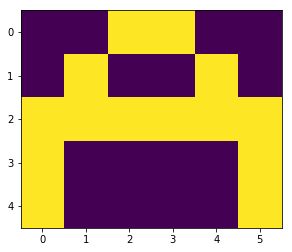

In [3]:
#visualizing the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()


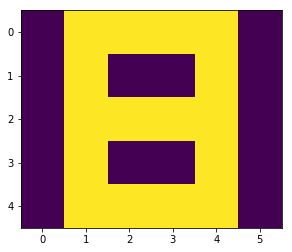

In [4]:
plt.imshow(np.array(b).reshape(5,6))
plt.show()

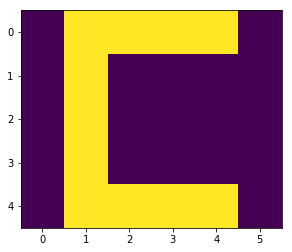

In [5]:
plt.imshow(np.array(c).reshape(5,6))
plt.show()

In [6]:
#activation function
def sigmoid(x):
    return(1/(1 + np.exp(-x))) 

In [7]:
#converting data and lebels into numpy array
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y=np.array(y)
x

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
         0, 1, 1, 0, 0, 0, 0, 1]]),
 array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
         1, 0, 0, 1, 1, 1, 1, 0]]),
 array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 1, 1, 1, 0]])]

In [8]:
# Creating the Feed forward neural network it 
# 1 Input layer(1,30)
# 1 hidden layer (1,5)
# 1 output layer(3,3)
def f_forward(x,w1,w2):
    #hidden
    z1=x.dot(w1)# input from layer 1 
    a1=sigmoid(z1)# out put of layer 2 
    
    # Output layer
    z2=a1.dot(w2)#input of out layer
    a2=sigmoid(z2)#output of out layer
    return(a2)

In [21]:
# initializing the weights randomly
def generate_wt(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))
    


In [22]:
# w1(30,5)
w1=generate_wt(30,5)
w2=generate_wt(5,3)
print(w1,"\n\n",w2)


[[ 0.75696605 -0.15959223 -1.43034587  0.17885107 -0.75859483]
 [-0.22870119  1.05882236 -0.15880572  0.11692122  0.58621482]
 [ 0.13926738  0.72963505  0.36050426  0.79866465 -0.17471235]
 [ 1.00708386  0.68803291  0.14110839 -0.7162728   0.69990794]
 [-0.90437131  0.63977434 -0.43317212  0.67134205 -0.9316605 ]
 [ 0.15860963 -1.17967773 -0.70747245  0.22870289  0.00940404]
 [ 1.40511247 -1.29543461  1.41613069 -0.97964787 -2.86220777]
 [ 0.66293564 -1.94013093 -0.78189238  1.44904122 -1.81131482]
 [ 0.4441061  -0.18751726 -2.58252033  0.23076863  0.12182448]
 [-0.60061323  0.39855851 -0.55612255  2.0201934   0.70525187]
 [-1.82925367  1.32004437  0.03226202 -0.79073523 -0.20750692]
 [-0.25756077 -1.37543232 -0.71369897 -0.13556156 -0.34918718]
 [ 0.26048374  2.49871398  1.01139237 -1.73242425 -0.67235417]
 [ 0.30351062 -0.45425039 -0.84046541 -0.60435352 -0.06281934]
 [ 0.43562048  0.66297676  1.76386981 -1.11794675  2.2012095 ]
 [-1.11051533  0.3462945   0.19136933  0.19717914 -1.78

In [23]:
# for loss we will be using mean square error(MSE)
def loss(out,Y):
    s=(np.square(out-Y))
    s=np.sum(s)/len(y)
    return(s)

In [24]:
def back_prop(x,y,w1,w2,alpha):
    
    # hiden layer
    z1=x.dot(w1)# input from layer 1 
    a1=sigmoid(z1)# out put of layer 2 
    
    # Output layer
    z2=a1.dot(w2)#input of out layer
    a2=sigmoid(z2)#output of out layer
    #error in output layer
    d2=(a2-y)
    d1=np.multiply((w2.dot((d2.transpose()))).transpose(),(np.multiply(a1,1-a1)))
    w1_adj=x.transpose().dot(d1)
    w2_adj=a1.transpose().dot(d2)
    
    w1=w1-(alpha*(w1_adj))
    w2=w2-(alpha*(w2_adj))
    
    return(w1,w2)
    
 
    

In [25]:
def train(x,Y,w1,w2,alpha=0.01,epoch=10):
    acc=[]
    losss=[]
    for j in range(epoch):
        l=[]
        for i in range(len(x)):
            out=f_forward(x[i],w1,w2)
            l.append((loss(out,Y[i])))
            w1,w2=back_prop(x[i],y[i],w1,w2,alpha)
        print("epochs:",j+1,"======== acc:",(1-(sum(l)/len(x)))*100)   
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc,losss,w1,w2)



acc,losss,w1,w2=train(x,y,w1,w2,0.1,2000)

epochs: 1 ======== acc: 61.847333332903396
epochs: 2 ======== acc: 65.83820707538648
epochs: 3 ======== acc: 69.99843921714043
epochs: 4 ======== acc: 73.71756437906798
epochs: 5 ======== acc: 76.3071560948026
epochs: 6 ======== acc: 77.96854394244501
epochs: 7 ======== acc: 79.17734188041827
epochs: 8 ======== acc: 80.15405517728593
epochs: 9 ======== acc: 80.99047950716826
epochs: 10 ======== acc: 81.72955653541402
epochs: 11 ======== acc: 82.3938699834746
epochs: 12 ======== acc: 82.99676422856402
epochs: 13 ======== acc: 83.5471798271064
epochs: 14 ======== acc: 84.0518671611663
epochs: 15 ======== acc: 84.51639775972471
epochs: 16 ======== acc: 84.94561097546818
epochs: 17 ======== acc: 85.34380468400178
epochs: 18 ======== acc: 85.71481903292731
epochs: 19 ======== acc: 86.06208124920452
epochs: 20 ======== acc: 86.38863971755754
epochs: 21 ======== acc: 86.69719738874477
epochs: 22 ======== acc: 86.99014703625019
epochs: 23 ======== acc: 87.26960799312363
epochs: 24 ======== acc

epochs: 207 ======== acc: 99.48786430485337
epochs: 208 ======== acc: 99.49324720892912
epochs: 209 ======== acc: 99.4985509906839
epochs: 210 ======== acc: 99.50377716623505
epochs: 211 ======== acc: 99.5089272172642
epochs: 212 ======== acc: 99.51400259193377
epochs: 213 ======== acc: 99.51900470577654
epochs: 214 ======== acc: 99.52393494255875
epochs: 215 ======== acc: 99.52879465511803
epochs: 216 ======== acc: 99.53358516617661
epochs: 217 ======== acc: 99.5383077691308
epochs: 218 ======== acc: 99.5429637288176
epochs: 219 ======== acc: 99.5475542822589
epochs: 220 ======== acc: 99.5520806393842
epochs: 221 ======== acc: 99.55654398373257
epochs: 222 ======== acc: 99.56094547313434
epochs: 223 ======== acc: 99.56528624037328
epochs: 224 ======== acc: 99.56956739383003
epochs: 225 ======== acc: 99.5737900181069
epochs: 226 ======== acc: 99.57795517463535
epochs: 227 ======== acc: 99.582063902266
epochs: 228 ======== acc: 99.5861172178422
epochs: 229 ======== acc: 99.5901161167574

epochs: 412 ======== acc: 99.91290237962083
epochs: 413 ======== acc: 99.91359681743978
epochs: 414 ======== acc: 99.91428310836264
epochs: 415 ======== acc: 99.9149613292033
epochs: 416 ======== acc: 99.91563155862687
epochs: 417 ======== acc: 99.9162938769926
epochs: 418 ======== acc: 99.91694836619905
epochs: 419 ======== acc: 99.91759510953268
epochs: 420 ======== acc: 99.91823419151955
epochs: 421 ======== acc: 99.91886569778107
epochs: 422 ======== acc: 99.91948971489418
epochs: 423 ======== acc: 99.92010633025575
epochs: 424 ======== acc: 99.92071563195195
epochs: 425 ======== acc: 99.9213177086327
epochs: 426 ======== acc: 99.92191264939107
epochs: 427 ======== acc: 99.922500543648
epochs: 428 ======== acc: 99.92308148104242
epochs: 429 ======== acc: 99.92365555132665
epochs: 430 ======== acc: 99.92422284426723
epochs: 431 ======== acc: 99.92478344955104
epochs: 432 ======== acc: 99.92533745669678
epochs: 433 ======== acc: 99.92588495497162
epochs: 434 ======== acc: 99.92642603

epochs: 695 ======== acc: 99.97942254456355
epochs: 696 ======== acc: 99.97949530287266
epochs: 697 ======== acc: 99.97956767891986
epochs: 698 ======== acc: 99.97963967540379
epochs: 699 ======== acc: 99.97971129499852
epochs: 700 ======== acc: 99.97978254035402
epochs: 701 ======== acc: 99.97985341409618
epochs: 702 ======== acc: 99.97992391882728
epochs: 703 ======== acc: 99.97999405712619
epochs: 704 ======== acc: 99.98006383154858
epochs: 705 ======== acc: 99.9801332446273
epochs: 706 ======== acc: 99.98020229887251
epochs: 707 ======== acc: 99.98027099677206
epochs: 708 ======== acc: 99.98033934079163
epochs: 709 ======== acc: 99.98040733337503
epochs: 710 ======== acc: 99.98047497694445
epochs: 711 ======== acc: 99.98054227390068
epochs: 712 ======== acc: 99.98060922662334
epochs: 713 ======== acc: 99.98067583747114
epochs: 714 ======== acc: 99.98074210878212
epochs: 715 ======== acc: 99.98080804287379
epochs: 716 ======== acc: 99.9808736420435
epochs: 717 ======== acc: 99.98093

epochs: 895 ======== acc: 99.98881461616568
epochs: 896 ======== acc: 99.98884409883702
epochs: 897 ======== acc: 99.9888734664906
epochs: 898 ======== acc: 99.98890271971915
epochs: 899 ======== acc: 99.9889318591116
epochs: 900 ======== acc: 99.98896088525309
epochs: 901 ======== acc: 99.98898979872502
epochs: 902 ======== acc: 99.98901860010506
epochs: 903 ======== acc: 99.98904728996725
epochs: 904 ======== acc: 99.98907586888191
epochs: 905 ======== acc: 99.98910433741574
epochs: 906 ======== acc: 99.98913269613185
epochs: 907 ======== acc: 99.98916094558976
epochs: 908 ======== acc: 99.98918908634545
epochs: 909 ======== acc: 99.9892171189514
epochs: 910 ======== acc: 99.98924504395656
epochs: 911 ======== acc: 99.9892728619064
epochs: 912 ======== acc: 99.989300573343
epochs: 913 ======== acc: 99.98932817880498
epochs: 914 ======== acc: 99.98935567882761
epochs: 915 ======== acc: 99.98938307394273
epochs: 916 ======== acc: 99.98941036467895
epochs: 917 ======== acc: 99.989437551

epochs: 1092 ======== acc: 99.99296789830598
epochs: 1093 ======== acc: 99.99298271191327
epochs: 1094 ======== acc: 99.99299747919974
epochs: 1095 ======== acc: 99.99301220035679
epochs: 1096 ======== acc: 99.99302687557481
epochs: 1097 ======== acc: 99.99304150504325
epochs: 1098 ======== acc: 99.99305608895057
epochs: 1099 ======== acc: 99.99307062748429
epochs: 1100 ======== acc: 99.9930851208309
epochs: 1101 ======== acc: 99.99309956917605
epochs: 1102 ======== acc: 99.99311397270438
epochs: 1103 ======== acc: 99.99312833159955
epochs: 1104 ======== acc: 99.99314264604439
epochs: 1105 ======== acc: 99.9931569162207
epochs: 1106 ======== acc: 99.99317114230942
epochs: 1107 ======== acc: 99.99318532449057
epochs: 1108 ======== acc: 99.9931994629432
epochs: 1109 ======== acc: 99.99321355784552
epochs: 1110 ======== acc: 99.99322760937481
epochs: 1111 ======== acc: 99.99324161770747
epochs: 1112 ======== acc: 99.99325558301898
epochs: 1113 ======== acc: 99.99326950548395
epochs: 1114 

epochs: 1347 ======== acc: 99.99563909579486
epochs: 1348 ======== acc: 99.99564637405662
epochs: 1349 ======== acc: 99.99565363423395
epochs: 1350 ======== acc: 99.99566087638637
epochs: 1351 ======== acc: 99.99566810057313
epochs: 1352 ======== acc: 99.99567530685327
epochs: 1353 ======== acc: 99.99568249528559
epochs: 1354 ======== acc: 99.99568966592861
epochs: 1355 ======== acc: 99.99569681884066
epochs: 1356 ======== acc: 99.9957039540798
epochs: 1357 ======== acc: 99.99571107170388
epochs: 1358 ======== acc: 99.99571817177049
epochs: 1359 ======== acc: 99.995725254337
epochs: 1360 ======== acc: 99.99573231946056
epochs: 1361 ======== acc: 99.99573936719803
epochs: 1362 ======== acc: 99.99574639760611
epochs: 1363 ======== acc: 99.99575341074124
epochs: 1364 ======== acc: 99.99576040665966
epochs: 1365 ======== acc: 99.9957673854173
epochs: 1366 ======== acc: 99.99577434706995
epochs: 1367 ======== acc: 99.99578129167315
epochs: 1368 ======== acc: 99.99578821928222
epochs: 1369 =

epochs: 1598 ======== acc: 99.99702191407212
epochs: 1599 ======== acc: 99.99702603610872
epochs: 1600 ======== acc: 99.99703014963654
epochs: 1601 ======== acc: 99.99703425467891
epochs: 1602 ======== acc: 99.99703835125902
epochs: 1603 ======== acc: 99.99704243940003
epochs: 1604 ======== acc: 99.99704651912499
epochs: 1605 ======== acc: 99.99705059045692
epochs: 1606 ======== acc: 99.99705465341869
epochs: 1607 ======== acc: 99.99705870803317
epochs: 1608 ======== acc: 99.99706275432307
epochs: 1609 ======== acc: 99.99706679231109
epochs: 1610 ======== acc: 99.99707082201982
epochs: 1611 ======== acc: 99.99707484347181
epochs: 1612 ======== acc: 99.99707885668947
epochs: 1613 ======== acc: 99.99708286169519
epochs: 1614 ======== acc: 99.99708685851125
epochs: 1615 ======== acc: 99.99709084715988
epochs: 1616 ======== acc: 99.99709482766325
epochs: 1617 ======== acc: 99.99709880004339
epochs: 1618 ======== acc: 99.99710276432229
epochs: 1619 ======== acc: 99.99710672052191
epochs: 16

epochs: 1818 ======== acc: 99.99775817040242
epochs: 1819 ======== acc: 99.99776086831655
epochs: 1820 ======== acc: 99.99776356138406
epochs: 1821 ======== acc: 99.99776624961652
epochs: 1822 ======== acc: 99.99776893302544
epochs: 1823 ======== acc: 99.99777161162233
epochs: 1824 ======== acc: 99.99777428541866
epochs: 1825 ======== acc: 99.99777695442583
epochs: 1826 ======== acc: 99.99777961865524
epochs: 1827 ======== acc: 99.99778227811827
epochs: 1828 ======== acc: 99.9977849328262
epochs: 1829 ======== acc: 99.99778758279037
epochs: 1830 ======== acc: 99.99779022802201
epochs: 1831 ======== acc: 99.99779286853234
epochs: 1832 ======== acc: 99.99779550433257
epochs: 1833 ======== acc: 99.99779813543385
epochs: 1834 ======== acc: 99.99780076184732
epochs: 1835 ======== acc: 99.99780338358404
epochs: 1836 ======== acc: 99.9978060006551
epochs: 1837 ======== acc: 99.9978086130715
epochs: 1838 ======== acc: 99.99781122084427
epochs: 1839 ======== acc: 99.99781382398434
epochs: 1840 

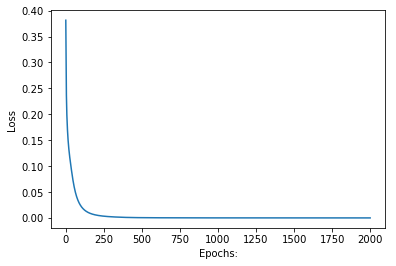

In [26]:
import matplotlib.pyplot as plt1
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


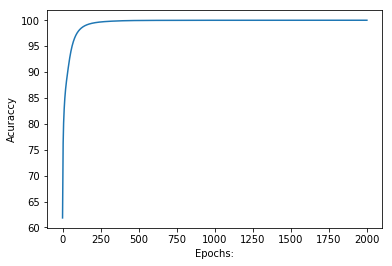

In [27]:
import matplotlib.pyplot as plt1
plt1.plot(acc)
plt1.ylabel('Acuraccy')
plt1.xlabel("Epochs:")
plt1.show()

In [28]:
#the trained weigths are
print(w1,"\n",w2)

[[ 0.75696605 -0.15959223 -1.43034587  0.17885107 -0.75859483]
 [-0.65076052  0.15414754 -0.14179795  0.1695589   0.55507796]
 [ 0.25859129  0.61305279  0.35554574  0.85134826 -0.25001228]
 [ 1.12640777  0.57145065  0.13614987 -0.66358918  0.62460801]
 [-1.32643063 -0.26490047 -0.41616435  0.72397973 -0.96279736]
 [ 0.15860963 -1.17967773 -0.70747245  0.22870289  0.00940404]
 [ 1.40511247 -1.29543461  1.41613069 -0.97964787 -2.86220777]
 [ 0.78225955 -2.05671319 -0.7868509   1.50172484 -1.88661475]
 [ 0.4441061  -0.18751726 -2.58252033  0.23076863  0.12182448]
 [-0.60061323  0.39855851 -0.55612255  2.0201934   0.70525187]
 [-1.66817125  1.30166423  1.43313062 -1.82227475  0.23685428]
 [-0.25756077 -1.37543232 -0.71369897 -0.13556156 -0.34918718]
 [ 0.80186698  3.28680653  0.98942608 -1.73237832 -0.71651724]
 [ 0.42283453 -0.57083266 -0.84542393 -0.5516699  -0.13811927]
 [ 0.5967029   0.64459662  3.1647384  -2.14948627  2.6455707 ]
 [-0.94943291  0.32791436  1.59223792 -0.83436038 -1.33

In [29]:
def pridict(x,w1,w2):
    Out=f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm=Out[0][i]
            k=i
    
    
    if(k==0):
        print("Image is of letter A.")
    elif(k==1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5,6))
    plt.show()    
            

Image is of letter B.


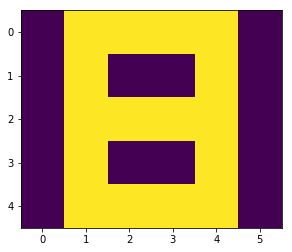

In [30]:
pridict(x[1],w1,w2)